Public score: 0.74237 and Private score: 0.50533

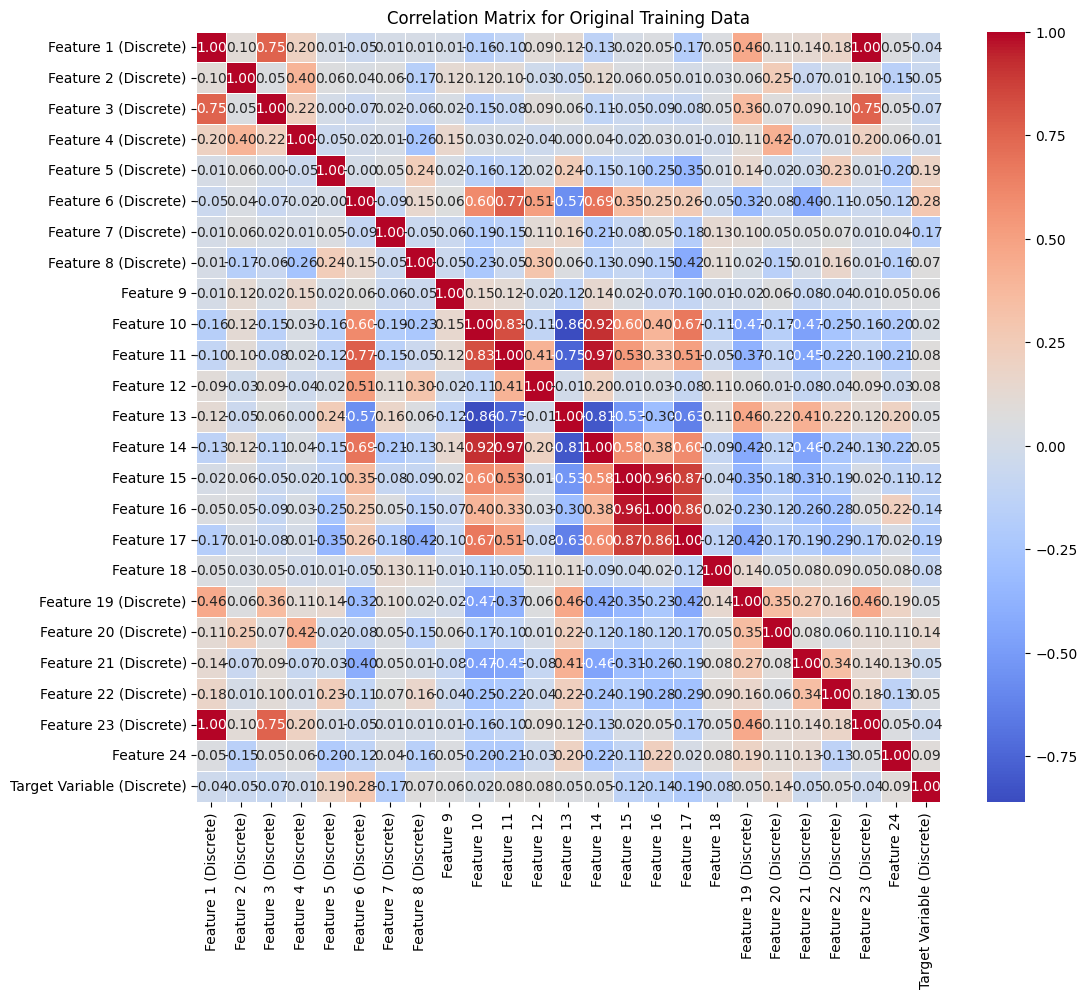

c:\Users\ravic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,Id,Category
0,1,6
1,2,2
2,3,1
3,4,1
4,5,1


In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('iith_foml_2023_train.csv')
test = pd.read_csv('test_input.csv')

corr_matrix_org = train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_org, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Original Training Data')
plt.show()

rem_fea = [
    'Feature 9', 'Feature 17','Feature 2 (Discrete)','Feature 1 (Discrete)', 'Feature 16', 'Feature 14'
]
train = train.drop(columns=rem_fea)
test = test.drop(columns=rem_fea)

X_train = train.drop(columns=['Target Variable (Discrete)'])
y_train = train['Target Variable (Discrete)']

X_train = X_train.fillna(X_train.mean())
test = test.fillna(test.mean())

sca = StandardScaler()
X_train_sca = sca.fit_transform(X_train)
test_sca = sca.transform(test)

gb_class = GradientBoostingClassifier(random_state=42)

params = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [7]
}

gri_sea = GridSearchCV(gb_class, params, cv=5, n_jobs=-1)
gri_sea.fit(X_train_sca, y_train)

best_params_gb_class = gri_sea.best_params_

best_gb_class = GradientBoostingClassifier(
    learning_rate=best_params_gb_class['learning_rate'],
    max_depth=best_params_gb_class['max_depth'],
    n_estimators=best_params_gb_class['n_estimators'],
    random_state=42
)
best_gb_class.fit(X_train_sca, y_train)

predi_bestgbclass = best_gb_class.predict(test_sca)

predi_bestgbclass_df = pd.DataFrame({'Id': range(1, len(predi_bestgbclass) + 1), 'Category': predi_bestgbclass})
predi_bestgbclass_df.to_csv('test_output.csv', index=False)

predi_bestgbclass_df.head()
